In [1]:
import torch
import torchvision
import os
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
from __future__ import print_function, division
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

RuntimeError: Detected that PyTorch and torchvision were compiled with different CUDA versions. PyTorch has CUDA Version=11.3 and torchvision has CUDA Version=10.2. Please reinstall the torchvision that matches your PyTorch install.

In [ ]:
# with ZipFile('video1.zip', 'r') as zipObj:
#    # Extract all the contents of zip file in current directory
#    zipObj.extractall()

In [ ]:
import cv2
root_dir = '/mnt/disk1/xanh/KGBasedPillRecognition_xa/DA_data/Vu'
folder_list =  os.listdir(root_dir)



In [ ]:
import cv2
dataset = {}
for folder_name in folder_list:
    rel_path=os.path.join(root_dir,folder_name)
    dataset[folder_name] = []
    for file in os.listdir(rel_path):
        img = cv2.imread(os.path.join(rel_path, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        dataset[folder_name].append(img)
        break
    break

# check perform of  craft





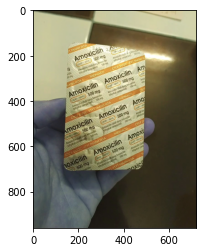

In [ ]:
import matplotlib.pyplot as plt
img_path = "../DA_data/test/15.jpg"
img = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (224, 224))
# img = np.expand_dims(img, axis=0)
# img = img / 255.0
plt.imshow(img)

from craft_text_detector import Craft

craft = Craft(crop_type='poly', cuda=True, text_threshold=0.6, \
        link_threshold=0.3, low_text=0.3, long_size=1280)
text_boxes = craft.detect_text(img)['boxes']


In [ ]:
img_box = img
import matplotlib.pyplot as plt
def plot(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.show()

In [ ]:
from PIL import Image, ImageEnhance

def boundingRect(bbox):
      bbox = bbox.astype(np.int)
      x0, y0 = np.min(bbox, axis=0)
      x1, y1 = np.max(bbox, axis=0)
      return x0, y0, x1, y1
detect_img_list = []

result_of_OCR = ""
# img_box = img_crop_list[32]
text_boxes = craft.detect_text(image=img_box)['boxes']
if len(text_boxes) > 0:
    text_boxes = [boundingRect(bbox) for bbox in text_boxes]
    text_boxes = sorted(text_boxes, key=lambda x: (x[3], x[2]))
s = []
legit_box = []
list_detect = []
dict_of_OCR = {}
dict_of_det = {}

'''
for bbox in text_boxes:
    x0, y0, x1, y1 = bbox
    if x0 < 0 or y0 < 0:
        continue
    try:
        img = img_box[y0 - 6: y1 + 6, x0  - 6: x1 + 6]
        detect_img_list.append(img)
        plot(img)
        img = Image.fromarray(img)
    
    except:
        try:
            img = img_box[y0 - 4: y1 + 4, x0  - 4: x1 + 4]
            detect_img_list.append(img)
            plot(img)
            img = Image.fromarray(img)
        except:
            try:
                img = img_box[y0 - 4: y1 + 4, x0  - 4: x1 + 4]
                detect_img_list.append(img)
                plot(img)
                img = Image.fromarray(img)
            except:
                img = img_box[y0: y1, x0: x1]
                detect_img_list.append(img)
                plot(img)
                img = Image.fromarray(img)              
'''

                


NameError: name 'craft' is not defined

In [ ]:
# import Craft class
from craft_text_detector import Craft
root_data_output = "/mnt/disk1/xanh/server_blister_packs/DATN_data/outputs"
folder_name = name_image.split('.')[0]

output_dir = os.path.join(root_data_output, folder_name)
if not os.path.exists(os.path.join(root_data_output, folder_name)):
    os.mkdir(output_dir)

image = f"../DATN_data/test/{name_image}" 

# create a craft instance
craft = Craft(output_dir=output_dir, crop_type="poly", cuda=False)

# apply craft text detection and export detected regions to output directory
prediction_result = craft.detect_text(image)

# unload models from ram/gpu
craft.unload_craftnet_model()
craft.unload_refinenet_model()

/home/aiotlab/anaconda3/envs/thanhnt_vaipe/lib/python3.9/site-packages/craft_text_detector/craft_utils.py:415: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  polys = np.array(polys)
/home/aiotlab/anaconda3/envs/thanhnt_vaipe/lib/python3.9/site-packages/craft_text_detector/predict.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  polys_as_ratio = np.array(polys_as_ratio)


In [ ]:
# import craft functions
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction,
    export_detected_regions,
    export_extra_results,
    empty_cuda_cache
)
def get_output_detect(name_image, output_dir):
    """
    Get the output of the text detection model.
    """
    # load the image 
    # set image path and export folder directory
    # read image
    # set image path and export folder directory


    root_data_output = output_dir
    folder_name = name_image.split('.')[0]

    output_dir = os.path.join(root_data_output, folder_name)
    if not os.path.exists(os.path.join(root_data_output, folder_name)):
        os.mkdir(output_dir)

    image = f"../DATN_data/test/{name_image}" 

    image = read_image(image)




    # load models
    refine_net = load_refinenet_model(cuda=False)
    craft_net = load_craftnet_model(cuda= False)

    # perform prediction
    prediction_result = get_prediction(
        image=image,
        craft_net=craft_net,
        refine_net=refine_net,
        text_threshold=0.7,
        link_threshold=0.4,
        low_text=0.4,
        cuda= False,
        long_size=1280
    )

    # export detected text regions
    exported_file_paths = export_detected_regions(
        image=image,
        regions=prediction_result["boxes"],
        output_dir=output_dir,
        rectify=True
    )

    # export heatmap, detection points, box visualization
    export_extra_results(
        image=image,
        regions=prediction_result["boxes"],
        heatmaps=prediction_result["heatmaps"],
        output_dir=output_dir
    )

    # unload models from gpu
    # empty_cuda_cache()

In [ ]:
# set image path and export folder directory
# read image
output_dir = "/mnt/disk1/xanh/server_blister_packs/DATN_data/outputs"
# set image path and export folder directory

name_image_list = ["19_dorogyne__(14).jpg"]

for name_image in name_image_list:
    get_output_detect(name_image, output_dir)



# Naive code  craft


In [5]:
from craft_text_detector import Craft
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction,
    export_detected_regions,
    export_extra_results,
    empty_cuda_cache
)


image = "/mnt/disk1/doan/xanh/server_blister_packs/DATN_data/test/75.jpg" 

image = read_image(image)

# load models
refine_net = load_refinenet_model(cuda=False)
craft_net = load_craftnet_model(cuda= False)

# perform prediction
prediction_result = get_prediction(
    image=image,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.7,
    link_threshold=0.4,
    low_text=0.4,
    cuda= False,
    long_size=1280
)

ModuleNotFoundError: No module named 'craft_text_detector'

In [2]:
import torch 
tensor1 = torch.randn(4, 4)
tensor2 = torch.randn(4, 4)
tensor3 = torch.randn(4, 4)
#   multiplication matrix tensor1, tensor2, tensor3
result = torch.mm(tensor1, torch.mm(tensor2, tensor3))
